# Prince Grover

In [96]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

Data used is from `CORGIS Dataset Project`
https://think.cs.vt.edu/corgis/csv/state_crime/state_crime.html

In [2]:
# importing csv file using pandas
state_crime = pd.read_csv('state_crime.csv')

In [3]:
state_crime.shape

(2751, 21)

In [4]:
# nulls?
state_crime.isnull().sum()

Population                  0
Rates.Property.All          0
Rates.Property.Burglary     0
Rates.Property.Larceny      0
Rates.Property.Motor        0
Rates.Violent.All           0
Rates.Violent.Assault       0
Rates.Violent.Murder        0
Rates.Violent.Rape          0
Rates.Violent.Robbery       0
State                       0
Totals.Property.All         0
Totals.Property.Burglary    0
Totals.Property.Larceny     0
Totals.Property.Motor       0
Totals.Violent.All          0
Totals.Violent.Assault      0
Totals.Violent.Murder       0
Totals.Violent.Rape         0
Totals.Violent.Robbery      0
Year                        0
dtype: int64

In [5]:
# unique in each column
state_crime.nunique()

Population                  2519
Rates.Property.All          2665
Rates.Property.Burglary     2479
Rates.Property.Larceny      2639
Rates.Property.Motor        2244
Rates.Violent.All           2333
Rates.Violent.Assault       2119
Rates.Violent.Murder         217
Rates.Violent.Rape           624
Rates.Violent.Robbery       1707
State                         52
Totals.Property.All         2735
Totals.Property.Burglary    2704
Totals.Property.Larceny     2730
Totals.Property.Motor       2603
Totals.Violent.All          2631
Totals.Violent.Assault      2541
Totals.Violent.Murder        938
Totals.Violent.Rape         1723
Totals.Violent.Robbery      2300
Year                          53
dtype: int64

In [6]:
state_crime.head()

,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,Rates.Violent.Assault,Rates.Violent.Murder,Rates.Violent.Rape,Rates.Violent.Robbery,...,Totals.Property.All,Totals.Property.Burglary,Totals.Property.Larceny,Totals.Property.Motor,Totals.Violent.All,Totals.Violent.Assault,Totals.Violent.Murder,Totals.Violent.Rape,Totals.Violent.Robbery,Year
0,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5,...,33823,11626,19344,2853,6097,4512,406,281,898,1960
1,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1,...,32541,11205,18801,2535,5564,4255,427,252,630,1961
2,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5,...,35829,11722,21306,2801,5283,3995,316,218,754,1962
3,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,5.7,24.7,...,38521,12614,22874,3033,6115,4755,340,192,828,1963
4,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,11.7,29.1,...,46290,15898,26713,3679,7260,5555,316,397,992,1964


In [7]:
state_crime.columns

Index(['Population', 'Rates.Property.All', 'Rates.Property.Burglary',
       'Rates.Property.Larceny', 'Rates.Property.Motor', 'Rates.Violent.All',
       'Rates.Violent.Assault', 'Rates.Violent.Murder', 'Rates.Violent.Rape',
       'Rates.Violent.Robbery', 'State', 'Totals.Property.All',
       'Totals.Property.Burglary', 'Totals.Property.Larceny',
       'Totals.Property.Motor', 'Totals.Violent.All', 'Totals.Violent.Assault',
       'Totals.Violent.Murder', 'Totals.Violent.Rape',
       'Totals.Violent.Robbery', 'Year'],
      dtype='object')

** Overview of data **
From the Unified Crime Reporting Statistics and under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation information crime statistics are available for public review. The following data set has information on the crime rates and totals for states across the United States for a wide range of years. The crime reports are divided into two main categories: property and violent crime. Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. These reports go from 1960 to 2012.

## Trend relationship

### regplot

`regplot` and `lmplot` are very similar in terms of functionalities and usage. But there are a few differences that we need to know. Both would fit a linear regression on given data and will give a trend line.   
* regplot() accepts data in variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data.   
* lmplot() has data as a required parameter and the x and y variables must be specified as strings but it has more features

Count chart for `total property crimes` with `year` whole USA

In [57]:
state_crime.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'United States'],
      dtype=object)

In [8]:
# let's filter some data
state_crime_usa = state_crime[state_crime.State == 'United States']
state_crime_states = state_crime[state_crime.State != 'United States']

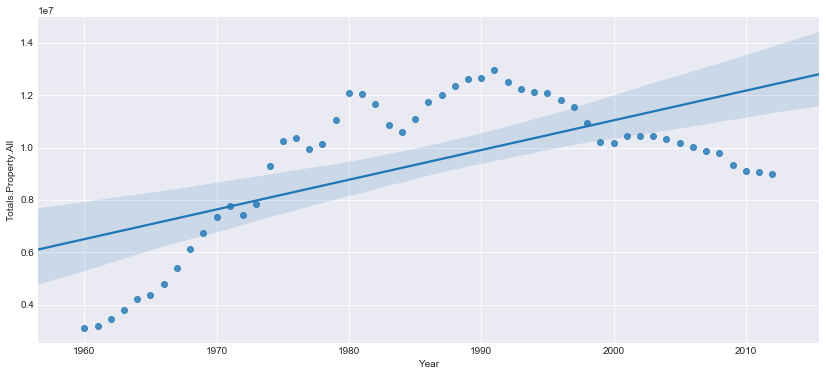

In [60]:
sns.set_style('darkgrid')  #changes the background of the plot
plt.figure(figsize=(14, 6))
sns.regplot(
    x="Year", y="Totals.Property.All", data=state_crime_usa,
    fit_reg=True)  #fit_Reg fits a regression line

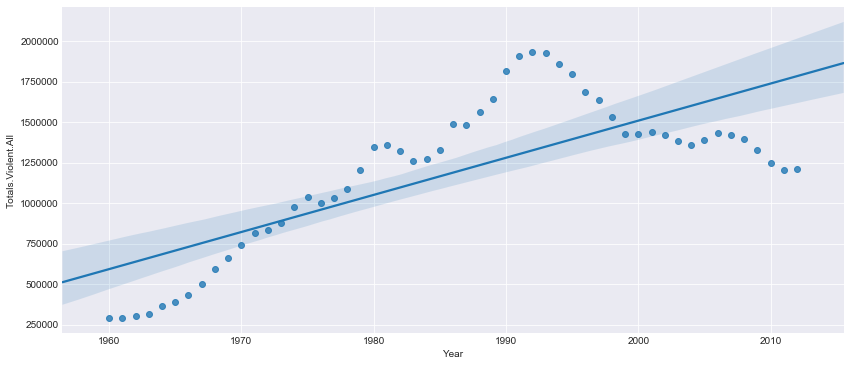

In [59]:
plt.figure(figsize=(14, 6))
sns.regplot(
    x="Year", y="Totals.Violent.All", data=state_crime_usa,
    fit_reg=True)  #fit_Reg fits a regression line

**The scatter plots show that the overall crime in USA increased till 1992, after which they started decreasing.**

We see in the first plot that a non-linear trend line would be better than linear trend. We can use `order=2` to make non-linear trend line

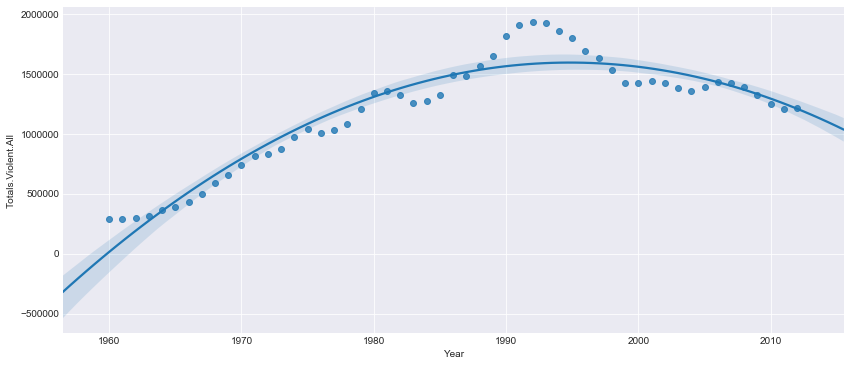

In [61]:
sns.set_style('darkgrid')  #changes the background of the plot
plt.figure(figsize=(14, 6))
sns.regplot(
    x="Year", y="Totals.Violent.All", data=state_crime_usa,
    fit_reg=True, order=2)  #fit_Reg fits a regression line


### lmplot

With lmplot(), we can also plot scatter points for each state and it would give approx trend line

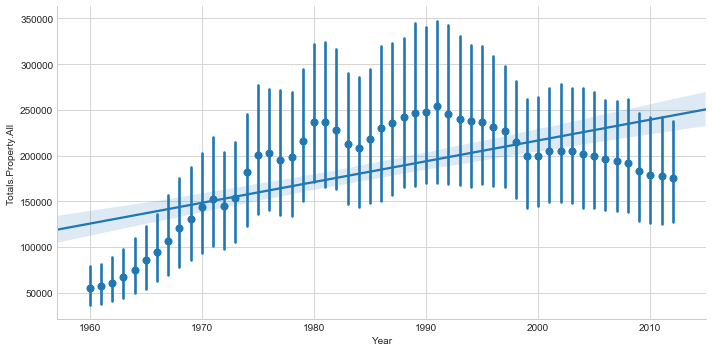

In [64]:
sns.set_style('whitegrid')
sns.lmplot(x="Year", y="Totals.Property.All", data=state_crime_states, x_estimator=np.mean, aspect=2);

**There is a similar trend in this also. But here it shows mean from each state as compares to sum of all states in the previous case**

We can make above plot for each state seperately also in form of grid by using `col` argument (means column)

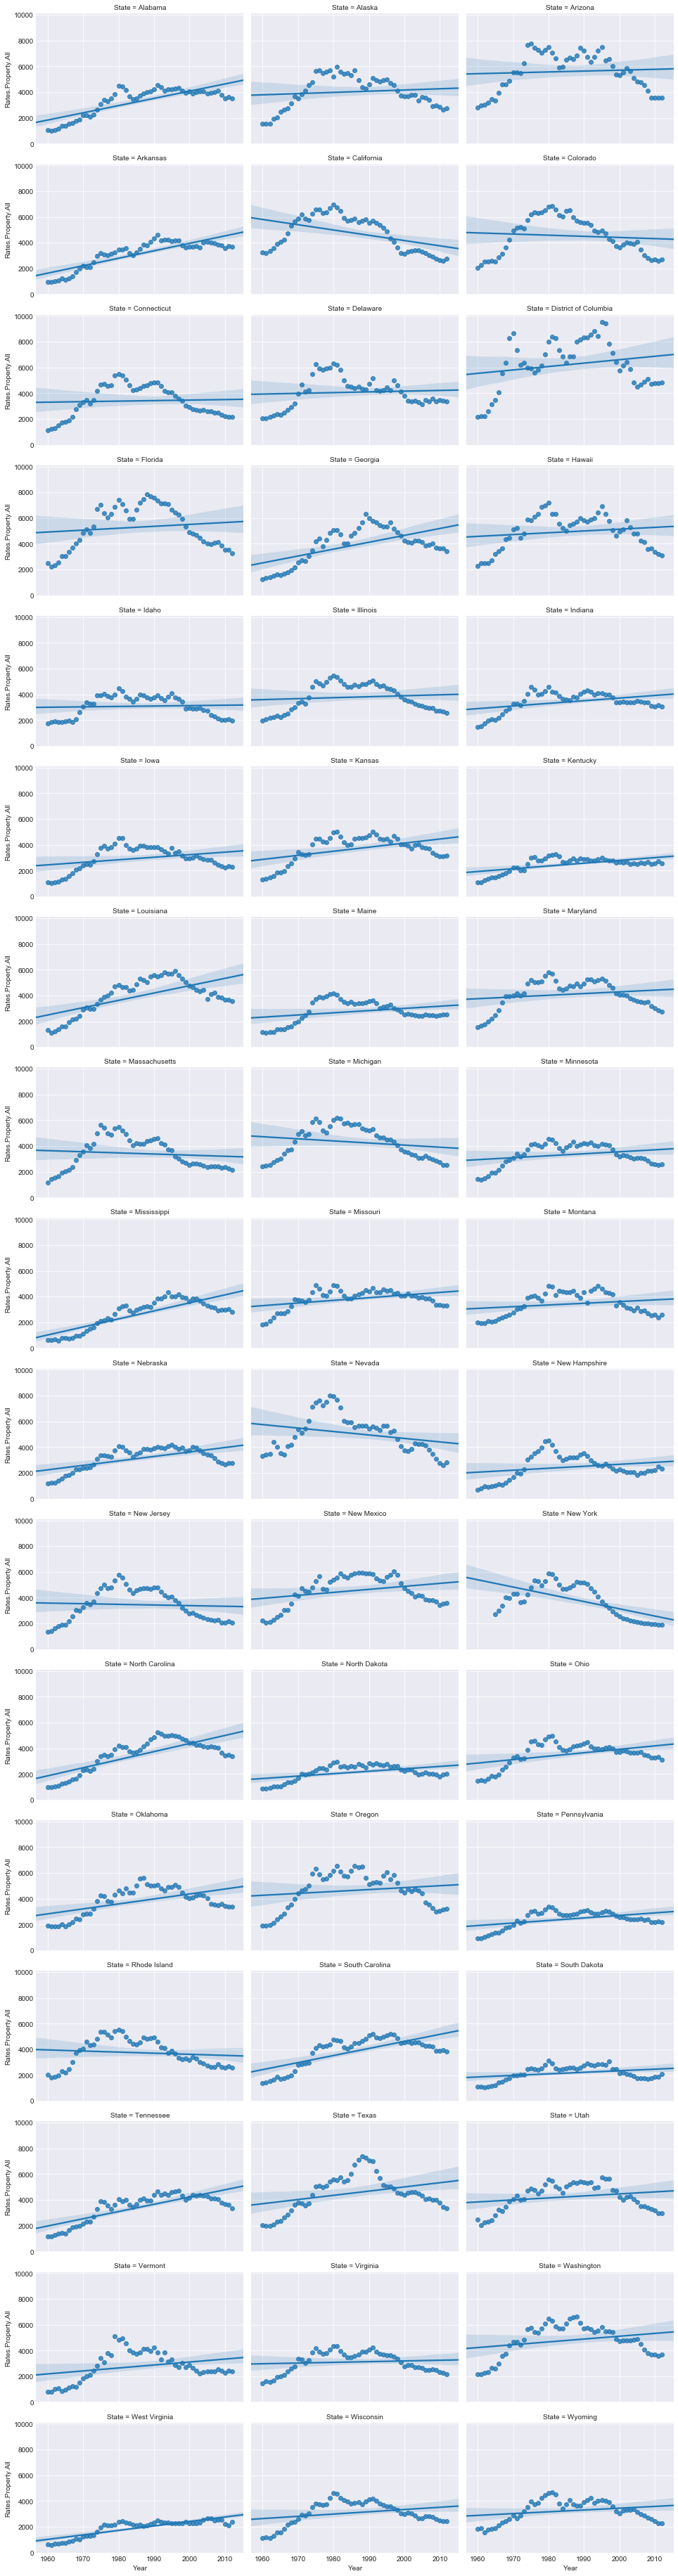

In [109]:
sns.set_style('darkgrid')
sns.lmplot(x="Year", y="Rates.Property.All",
           data=state_crime_states,
           col='State',
           col_wrap = 3,
           size=3,
           y_jitter=0.5,
           aspect = 1.5);

### pairplot
The two plots which have shared x or y axis can be made using pairplot

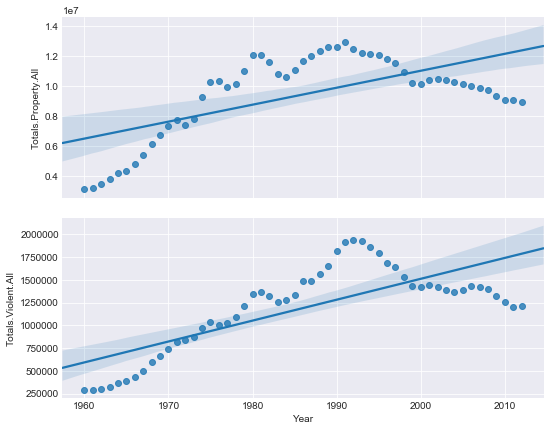

In [74]:
sns.pairplot(state_crime_usa, x_vars=["Year"], y_vars=["Totals.Property.All", 'Totals.Violent.All'],
             size=3, aspect=2.5, kind="reg");

Comparing only Texas, NY, Florida and California (4 famous states of USA) using 1 figure, but different colors. Use `hue` 

In [13]:
state_crime_four_states = state_crime[state_crime.State.isin(['Florida', 'California', 'New York', 'Texas'])]

In [82]:
state_crime_four_states.shape

(207, 21)

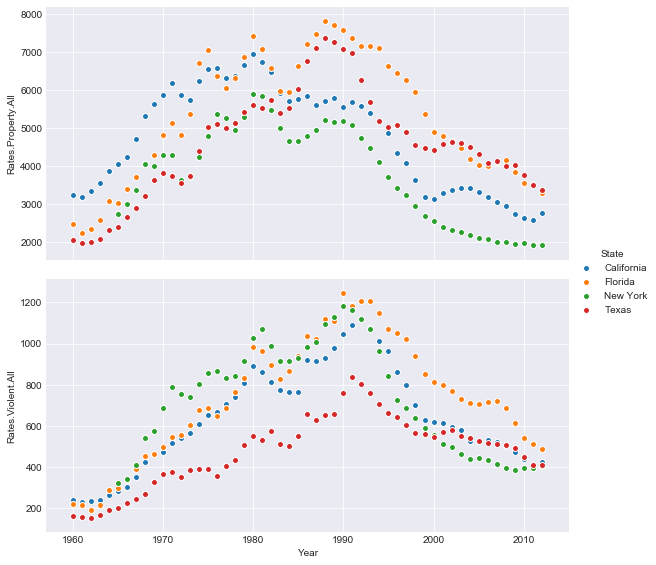

In [108]:
sns.set_style('darkgrid')
sns.pairplot(state_crime_four_states, x_vars=["Year"], y_vars=["Rates.Property.All", 'Rates.Violent.All'],
           hue = 'State',
           size=4,
           aspect = 2, kind = 'scatter'
  );

Rate of both crimes per 1000 population is highest in Florida for most of the times.  After year 2000, rates are lowest in NY

## Univariate Distributions

### distplot
Univariate distribution of observations (combines seaborn's kdeplot with matplotlib hist with good default bins)

Distribution of crime rates in USA in the recent year only for all states

In [117]:
state_crime_states.Year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])

Text(0.5,1,'Latest Property Crime Rate')

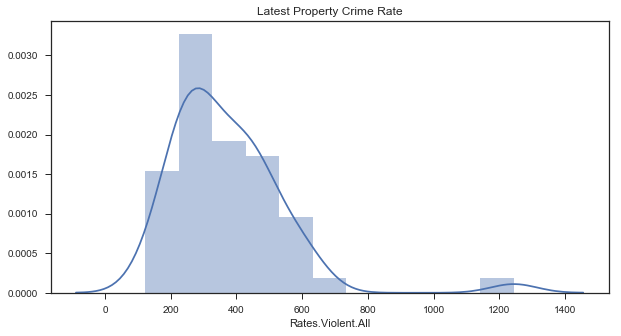

In [97]:
# plots a gaussian kernel density line also (smooth version of histogram)
sns.set_style('ticks')
plt.figure(figsize=(10, 5))
ax = sns.distplot(state_crime_states[state_crime_states.Year == 2012]['Rates.Violent.All'])
ax.set_title('Latest Property Crime Rate')

Text(0.5,1,'Latest Property Crime Rate')

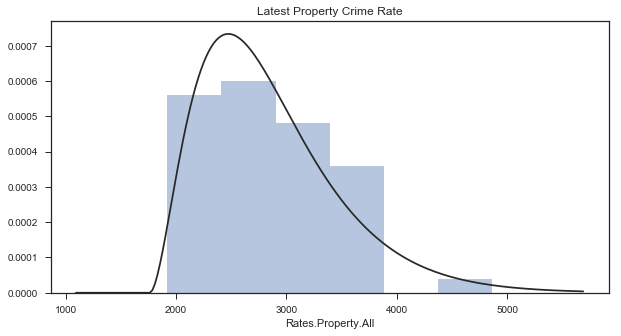

In [98]:
# we can fit distribution we want also. rather than default kernel density
sns.set_style('ticks')
plt.figure(figsize=(10, 5))
ax = sns.distplot(state_crime_states[state_crime_states.Year == 2012]['Rates.Property.All'],
                 kde=False, fit=stats.gamma)
ax.set_title('Latest Property Crime Rate')

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Latest Population Distribution')

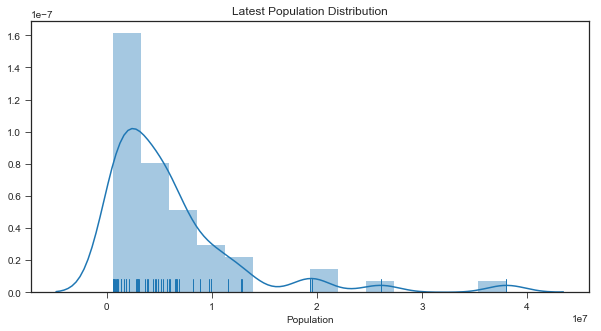

In [126]:
# rug=True makes ticks for each observation
sns.set_style('ticks')
plt.figure(figsize=(10, 5))
ax = sns.distplot(state_crime_states[state_crime_states.Year == 2012]['Population'],
                 kde=True, rug=True)
ax.set_title('Latest Population Distribution')

**A few states have very small population**

### kdeplot
Kernel density estimate curve

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


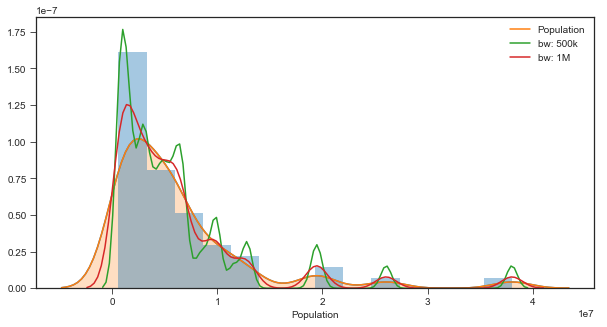

In [166]:
# bw is like smoothing paramter for kernel line (basically think of bin size of histogram)
# shade = True, fills are area of density plot
x = state_crime_states[state_crime_states.Year == 2012]['Population']
plt.figure(figsize=(10, 5))
sns.distplot(x)
sns.kdeplot(x, shade=True)
sns.kdeplot(x, bw=500000, label="bw: 500k")
sns.kdeplot(x, bw=1000000, label="bw: 1M")

plt.legend();

### boxplot
Boxplot to show distributions with respect to categories

In [9]:
state_crime_states_2012 = state_crime_states[state_crime_states.Year == 2012]

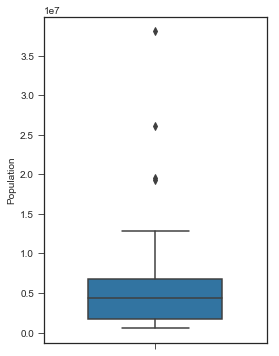

In [174]:
plt.figure(figsize=(4, 6))
sns.boxplot(y='Population', data=state_crime_states_2012, width=.6)

## Bivariate Distributions

### jointplot

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


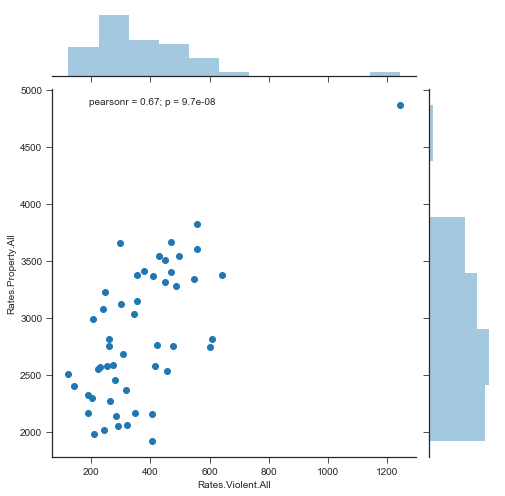

In [184]:
#plt.figure(figsize=(12,6)) # doesn't work here
sns.jointplot(x="Rates.Violent.All",
              y="Rates.Property.All",
              data=state_crime_states_2012,
             size = 7);

**In 2012, overall violence crime rate is generally in low range of 200-500 per 100,000 poplulatation. But property crime rate is varying from 2000 to 4000 for different sates. **

### pairwise 
Pairwise bivariate distribution in a dataset

Is there relationship b/w different crime rates in different states of USA in 2012?

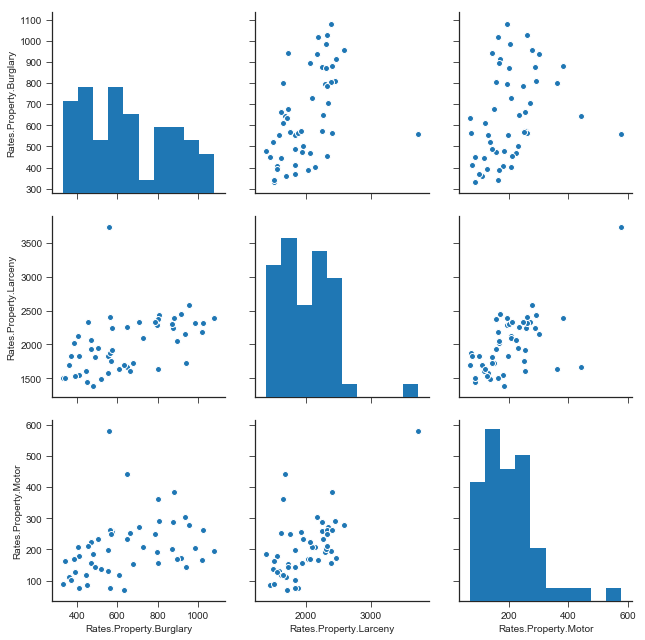

In [193]:
sns.pairplot(state_crime_states_2012[[ 'Rates.Property.Burglary',
                                      'Rates.Property.Larceny',
                                      'Rates.Property.Motor']], size = 3);

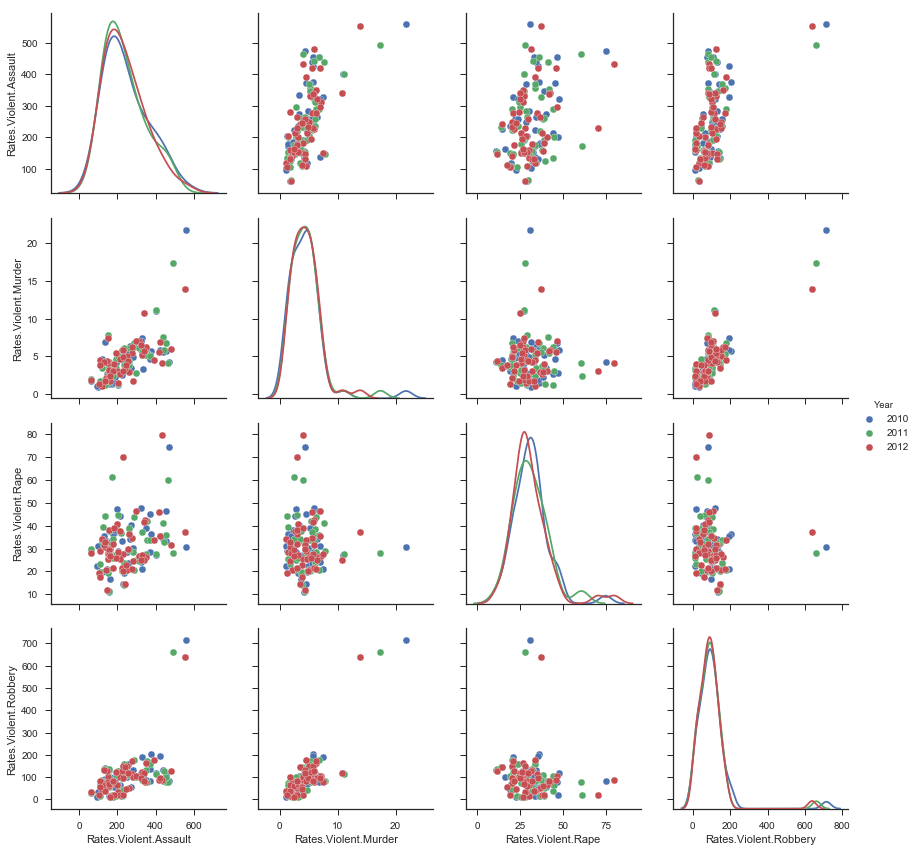

In [203]:
# can add hue =   if want to add colors to categories
# can add columns of interest in vars also
sns.set_style('ticks')

sns.pairplot(state_crime_states[state_crime_states.Year.isin([2010,2011,2012])],
             vars= ['Rates.Violent.Assault',
                    'Rates.Violent.Murder',
                    'Rates.Violent.Rape',
                    'Rates.Violent.Robbery'],
             hue='Year',
             size = 3,
            diag_kind='kde');

**Observations** In most of the states, the cases of violent robbery as relatively less. Across States, occurence of one type of crime is also correlated with most of other crimes, especially in property related crimes

## Plotting with Categorical data

### stripplot
Categorical scatter plot

In [10]:
sns.set(style="whitegrid", color_codes=True)

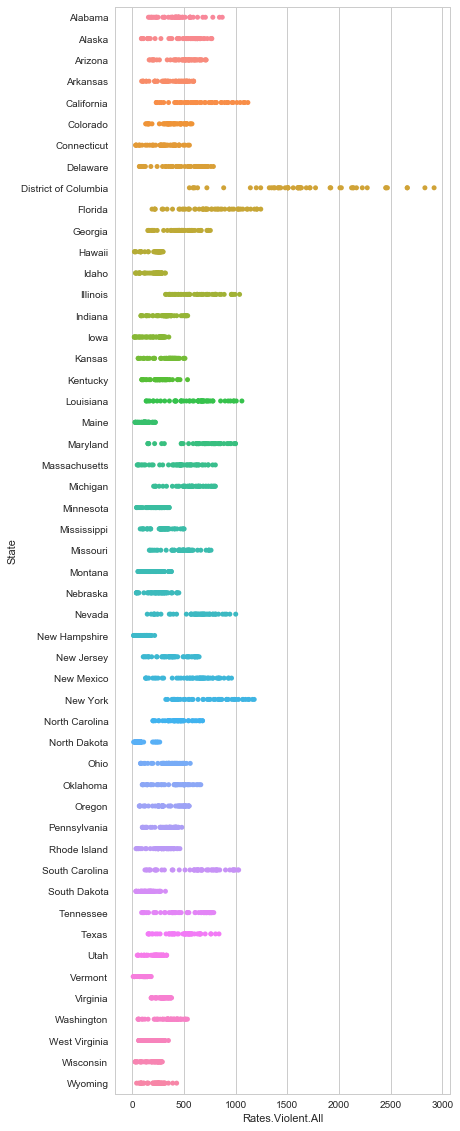

In [24]:
plt.figure(figsize=(6,20))
sns.stripplot(x="Rates.Violent.All", y="State", data=state_crime_states, size=5);

### swarmplot
Similar to stripplot, but shows all points by spreading points in horizontal direction

In [25]:
state_crime_four_states.Year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])

In [26]:
f = lambda x: 'new' if x.Year > 2000 else 'old'

In [27]:
state_crime_four_states['old_new'] = state_crime_four_states.apply(f, axis=1)

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
state_crime_four_states.old_new.value_counts()

old    159
new     48
Name: old_new, dtype: int64

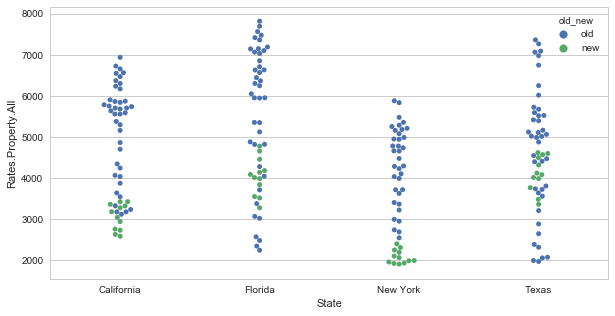

In [31]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="State", y="Rates.Property.All",
              data=state_crime_four_states, 
              hue='old_new',
              size=5);

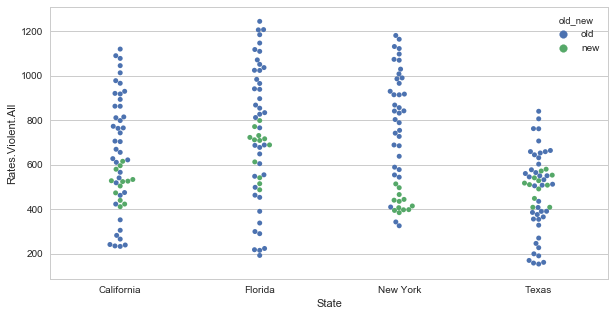

In [32]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="State", y="Rates.Violent.All",
              data=state_crime_four_states, 
              hue='old_new',
              size=5);

**Observation:** New York has very low property and violent crime after 2000. Texas still has high relative property crime rate.
California has also done a good job to reduce crime rate 

### boxplot (multicategories)
Boxplot for quantiles (for multiple categories)

Same data as above to explore boxplot and violin plot

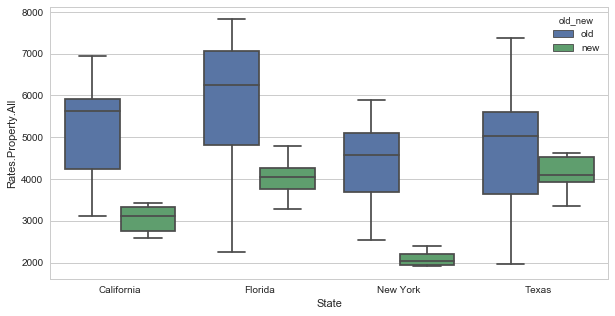

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x="State", y="Rates.Property.All",
              data=state_crime_four_states, 
              hue='old_new', dodge=True);

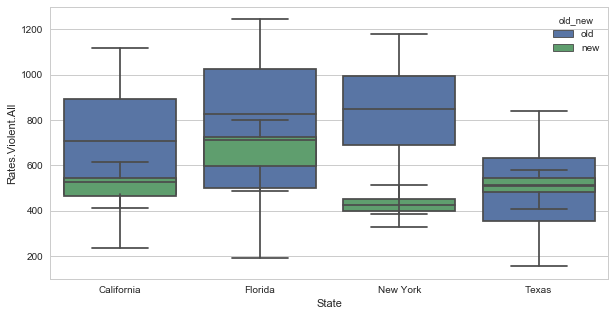

In [37]:
# can also do dodge=False
plt.figure(figsize=(10,5))
sns.boxplot(x="State", y="Rates.Violent.All",
              data=state_crime_four_states, 
              hue='old_new', dodge=False);

### violinplot
Similar to boxplot, but also shows distribution of data

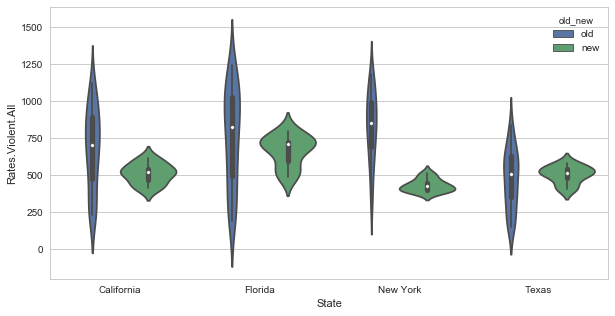

In [40]:
plt.figure(figsize=(10,5))
sns.violinplot(x="State", y="Rates.Property.All",
              data=state_crime_four_states, 
              hue='old_new');

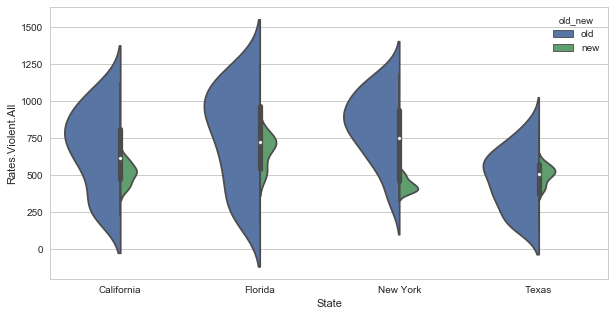

In [47]:
# split=True to combine violin plots. it can be used when hue has only 2 values like our case
# scale = count makes plot based on actual count in each category of hue
plt.figure(figsize=(10,5))
sns.violinplot(x="State", y="Rates.Violent.All",
              data=state_crime_four_states, 
              hue='old_new',
               split=True, 
              scale='count');

In [45]:
state_crime_four_states.State.value_counts()

Florida       53
California    53
Texas         53
New York      48
Name: State, dtype: int64

Smoothening of violin plots are sensitive to number of samples. In our case, data for all states have ~same number of samples

In [46]:
pd.crosstab(state_crime_four_states.State, state_crime_four_states.old_new)

old_new,new,old
State,,
California,12,41
Florida,12,41
New York,12,36
Texas,12,41


### barplots
central tendency with confidence interval

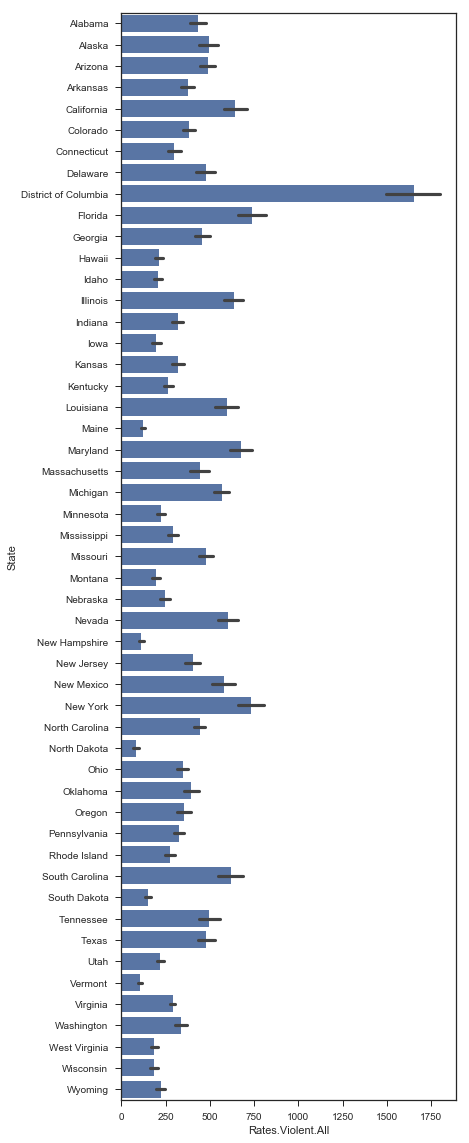

In [54]:
sns.set_style(style='ticks')
plt.figure(figsize=(6,20))
sns.barplot(x='Rates.Violent.All', y='State', data=state_crime_states, color='b')

States like Vermond, North Dakota have low mean violent crime rate. District of columbia has very high average crime rate. 

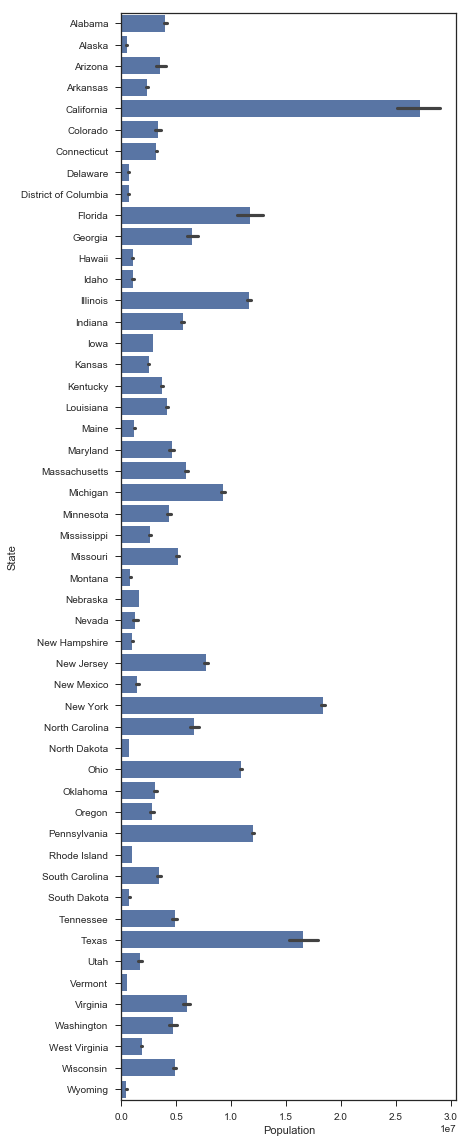

In [55]:
sns.set_style(style='ticks')
plt.figure(figsize=(6,20))
sns.barplot(x='Population', y='State', data=state_crime_states, color='b')

The population in District of Columbia is very low. That might be contributing to its high rate of crime. California is highest populated state in US, followed by NY

In [57]:
state_crime_states['old_new'] = state_crime_states.apply(f, axis=1)

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


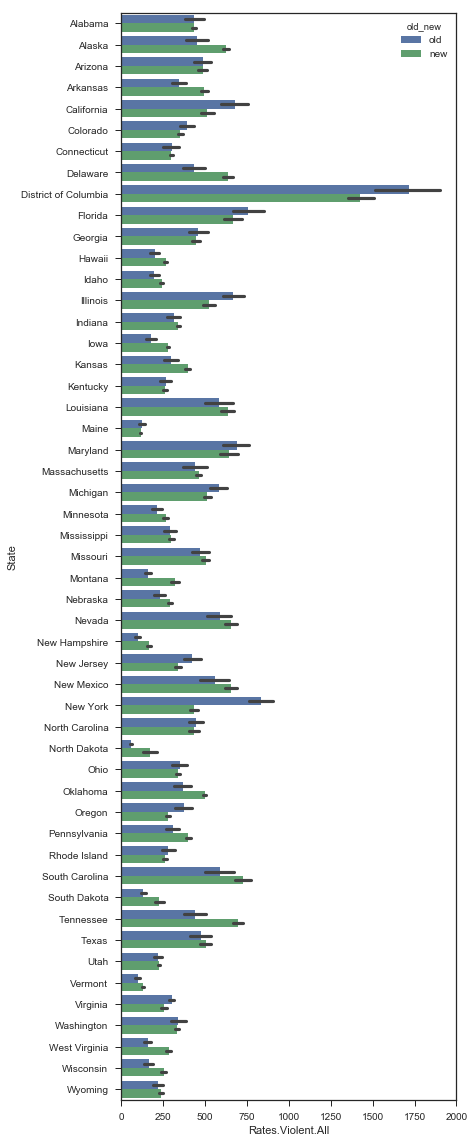

In [60]:
# barplots with hue
sns.set_style(style='ticks')
plt.figure(figsize=(6,20))
sns.barplot(x='Rates.Violent.All',
            y='State',
            data=state_crime_states,
            hue='old_new')

**Violent crime rate has increased in Alaska, Tennessae, West Virginia, Wisconsin than before 2000**

### pointplot
Same information as boxplot can also be visualized using pointplot

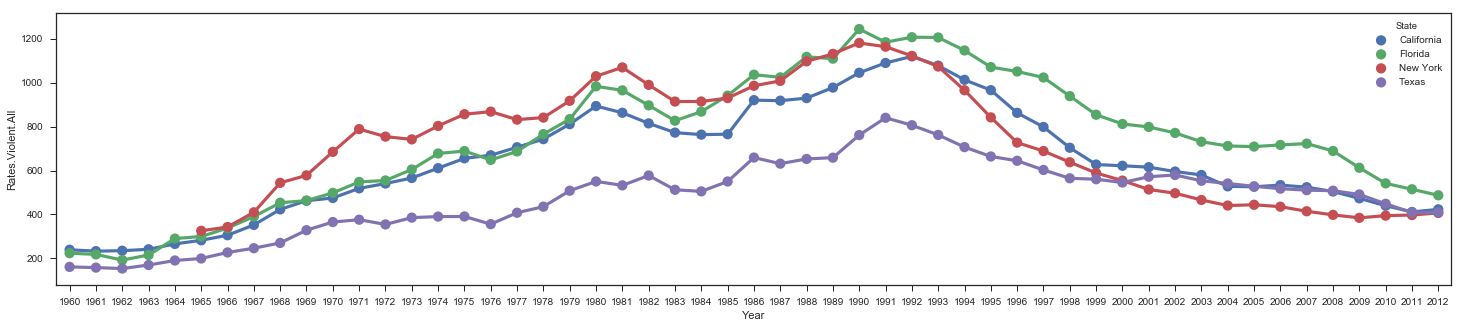

In [73]:
# pointplot with hue
sns.set_style(style='ticks')
plt.figure(figsize=(25,5))
sns.pointplot(y='Rates.Violent.All',
            x='Year',
            data=state_crime_four_states,
            hue='State')

Rate has followed similar pattern in these 4 states

### countplot
Gives count of observation in each category rather than mean as in barplot

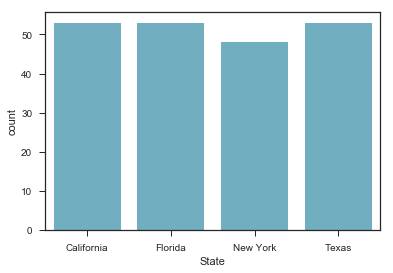

In [95]:
# pointplot with hue
sns.set_style(style='ticks')
#plt.figure(figsize=(25,5))
sns.countplot(x='State',
            data=state_crime_four_states,
            color='c')

Use of countplot here doesn't make sense here actually. This is just for exploration purpose

### facetgrid
Apply pyplot plots for sublevels of categories

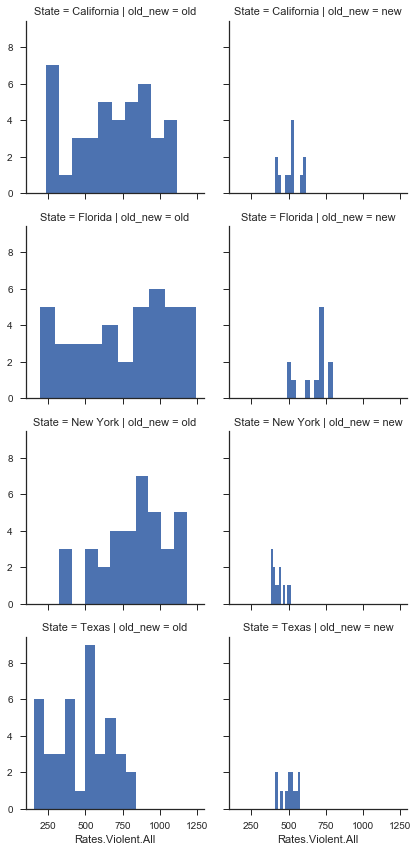

In [83]:
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(state_crime_four_states, col="old_new",  row="State")
g = g.map(plt.hist, "Rates.Violent.All")

Can apply scatter funciton on facegrid

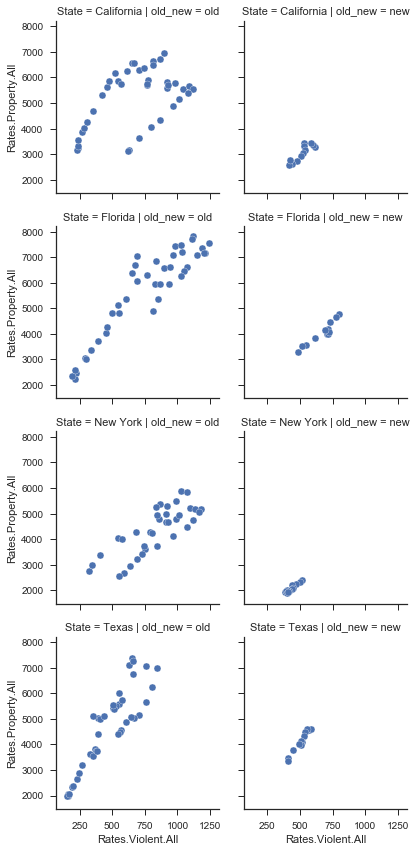

In [88]:
# x and y needed here
g = sns.FacetGrid(state_crime_four_states, col="old_new",  row="State")
g.map(plt.scatter, "Rates.Violent.All", "Rates.Property.All", edgecolor="w")

## End